In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit
import warnings
warnings.filterwarnings("ignore")

In [2]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = expit(z)
    return g

In [3]:
def displayData(X, example_width=None):
    m,n = X.shape
    plt.figure()
    if X.ndim == 1:
        X = np.reshape(X, (-1,m))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    plt.set_cmap("gray")
    example_height = n / example_width
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * int(example_height + pad),  pad + display_cols * int(example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (int(example_height) + pad) + np.array(range(int(example_height)))
            cols = pad + (i - 1) * (int(example_width)  + pad) + np.array(range(int(example_width)))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (int(example_height), int(example_width)), order="F") / max_val
            curr_ex += 1
            if curr_ex > m:
                break
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

In [4]:
def costFunction(theta, X, y, lambda_reg, return_grad=False):
    m = len(y)
    J = 0
    grad = np.zeros(theta.shape)
    one = y * np.transpose(np.log( sigmoid( np.dot(X,theta) ) ))
    two = (1-y) * np.transpose(np.log( 1 - sigmoid( np.dot(X,theta) ) ))
    reg = ( float(lambda_reg) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    J = -(1./m)*(one+two).sum() + reg
    grad = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T + ( float(lambda_reg) / m )*theta
    grad_no_regularization = (1./m) * np.dot(sigmoid( np.dot(X,theta) ).T - y, X).T
    grad[0] = grad_no_regularization[0]
    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [5]:
def oneVsAll(X, y, num_labels, lambda_reg):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.column_stack((np.ones((m,1)), X))
    for c in range(num_labels):
        initial_theta = np.zeros((n + 1, 1))
        myargs = (X, (y%10==c).astype(int), lambda_reg, True)
        theta = minimize(costFunction, x0=initial_theta, args=myargs, options={'disp': True, 'maxiter':13}, method="Newton-CG", jac=True)
        all_theta[c,:] = theta["x"]
    return all_theta

In [6]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros((m, 1))
    X = np.column_stack((np.ones((m,1)), X))
    p = np.argmax(sigmoid( np.dot(X,all_theta.T) ), axis=1)
    return p

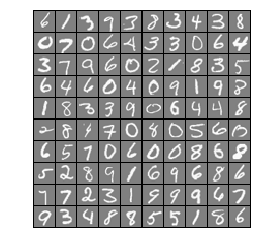

(<matplotlib.image.AxesImage at 0x9a5ee80>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ..., 
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

In [7]:
input_layer_size = 400
num_labels = 10
data = scipy.io.loadmat('hand_written_numbers.mat')
X=data["X"]
y=data["y"]
m,n=X.shape
y=y.flatten()
rand_indices = np.random.permutation(m)
random_images = X[rand_indices[:100],:]
displayData(random_images);

In [8]:
lambda_reg = 0.1;
all_theta = oneVsAll(X, y, num_labels, lambda_reg);
pred = predictOneVsAll(all_theta, X);
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y%10)*100)));
print('Training Set Accuracy for 1:  {:f}'.format(np.mean(pred[500:1000]  == y.flatten()[500:1000]%10)  * 100));
print('Training Set Accuracy for 2:  {:f}'.format(np.mean(pred[1000:1500] == y.flatten()[1000:1500]%10) * 100));
print('Training Set Accuracy for 3:  {:f}'.format(np.mean(pred[1500:2000] == y.flatten()[1500:2000]%10) * 100));
print('Training Set Accuracy for 4:  {:f}'.format(np.mean(pred[2000:2500] == y.flatten()[2000:2500]%10) * 100));
print('Training Set Accuracy for 5:  {:f}'.format(np.mean(pred[2500:3000] == y.flatten()[2500:3000]%10) * 100));
print('Training Set Accuracy for 6:  {:f}'.format(np.mean(pred[3000:3500] == y.flatten()[3000:3500]%10) * 100));
print('Training Set Accuracy for 7:  {:f}'.format(np.mean(pred[3500:4000] == y.flatten()[3500:4000]%10) * 100));
print('Training Set Accuracy for 8:  {:f}'.format(np.mean(pred[4000:4500] == y.flatten()[4000:4500]%10) * 100));
print('Training Set Accuracy for 9:  {:f}'.format(np.mean(pred[4500:5000] == y.flatten()[4500:5000]%10) * 100));
print('Training Set Accuracy for 10: {:f}'.format(np.mean(pred[0:500]     == y.flatten()[0:500]%10)     * 100));

         Current function value: 0.008568
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 300
         Hessian evaluations: 0
         Current function value: 0.013374
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 200
         Hessian evaluations: 0
         Current function value: 0.050802
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 401
         Hessian evaluations: 0
         Current function value: 0.057690
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 384
         Hessian evaluations: 0
         Current function value: 0.033212
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 281
         Hessian evaluations: 0
         Current function value: 0.054945
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 311
         Hessian evaluations: 

In [9]:
#Randomize all the digits
rand_indices = np.random.permutation(m)
random_X = X[rand_indices[:m],:]
random_y = y[rand_indices[:m]]

Input the index of the random image you want to predict 78
Predicted digit  [6]
Actual digit  6


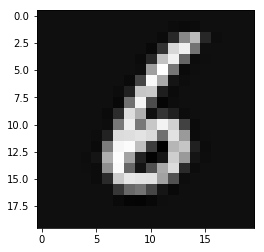

In [15]:
num_digit=int(input("Input the index of the random image you want to predict "))
pred1=predictOneVsAll(all_theta, random_X[num_digit,:].reshape(1,-1))
print("Predicted digit ", pred1)
print("Actual digit ",random_y[num_digit])
plt.imshow((random_X[num_digit,:].reshape(20,20)).T)
plt.show()